In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/Students Social Media Addiction (1).csv")
df.head()

,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
0,1,19,Female,Undergraduate,Bangladesh,5.2,Instagram,Yes,6.5,6,In Relationship,3,8
1,2,22,Male,Graduate,India,2.1,Twitter,No,7.5,8,Single,0,3
2,3,20,Female,Undergraduate,USA,6.0,TikTok,Yes,5.0,5,Complicated,4,9
3,4,18,Male,High School,UK,3.0,YouTube,No,7.0,7,Single,1,4
4,5,21,Male,Graduate,Canada,4.5,Facebook,Yes,6.0,6,In Relationship,2,7


In [ ]:
# handling missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 705 entries, 0 to 704
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Student_ID                    705 non-null    int64  
 1   Age                           705 non-null    int64  
 2   Gender                        705 non-null    object 
 3   Academic_Level                705 non-null    object 
 4   Country                       705 non-null    object 
 5   Avg_Daily_Usage_Hours         705 non-null    float64
 6   Most_Used_Platform            705 non-null    object 
 7   Affects_Academic_Performance  705 non-null    object 
 8   Sleep_Hours_Per_Night         705 non-null    float64
 9   Mental_Health_Score           705 non-null    int64  
 10  Relationship_Status           705 non-null    object 
 11  Conflicts_Over_Social_Media   705 non-null    int64  
 12  Addicted_Score                705 non-null    int64  
dtypes: fl

## Handle duplicate rows

### Subtask:
Remove any duplicate rows from the dataframe to ensure data uniqueness.


**Reasoning**:
Check for and remove duplicate rows from the DataFrame.



In [ ]:
num_duplicates = df.duplicated().sum()
print(f"Number of duplicate rows before removal: {num_duplicates}")
if num_duplicates > 0:
    df.drop_duplicates(inplace=True)
    num_duplicates_after = df.duplicated().sum()
    print(f"Number of duplicate rows after removal: {num_duplicates_after}")

Number of duplicate rows before removal: 0


### Standardize categorical variables

### Subtask:
Examine the unique values in categorical columns to identify and standardize any inconsistencies.


**Reasoning**:
Iterate through each column, check if it's an object type, and print unique values to identify inconsistencies.



In [ ]:
for col in df.columns:
    if df[col].dtype == 'object':
        print(f"Unique values in column '{col}':")
        print(df[col].unique())
        print("-" * 30)

Unique values in column 'Gender':
['Female' 'Male']
------------------------------
Unique values in column 'Academic_Level':
['Undergraduate' 'Graduate' 'High School']
------------------------------
Unique values in column 'Country':
['Bangladesh' 'India' 'USA' 'UK' 'Canada' 'Australia' 'Germany' 'Brazil'
 'Japan' 'South Korea' 'France' 'Spain' 'Italy' 'Mexico' 'Russia' 'China'
 'Sweden' 'Norway' 'Denmark' 'Netherlands' 'Belgium' 'Switzerland'
 'Austria' 'Portugal' 'Greece' 'Ireland' 'New Zealand' 'Singapore'
 'Malaysia' 'Thailand' 'Vietnam' 'Philippines' 'Indonesia' 'Taiwan'
 'Hong Kong' 'Turkey' 'Israel' 'UAE' 'Egypt' 'Morocco' 'South Africa'
 'Nigeria' 'Kenya' 'Ghana' 'Argentina' 'Chile' 'Colombia' 'Peru'
 'Venezuela' 'Ecuador' 'Uruguay' 'Paraguay' 'Bolivia' 'Costa Rica'
 'Panama' 'Jamaica' 'Trinidad' 'Bahamas' 'Iceland' 'Finland' 'Poland'
 'Romania' 'Hungary' 'Czech Republic' 'Slovakia' 'Croatia' 'Serbia'
 'Slovenia' 'Bulgaria' 'Estonia' 'Latvia' 'Lithuania' 'Ukraine' 'Moldova'
 'B

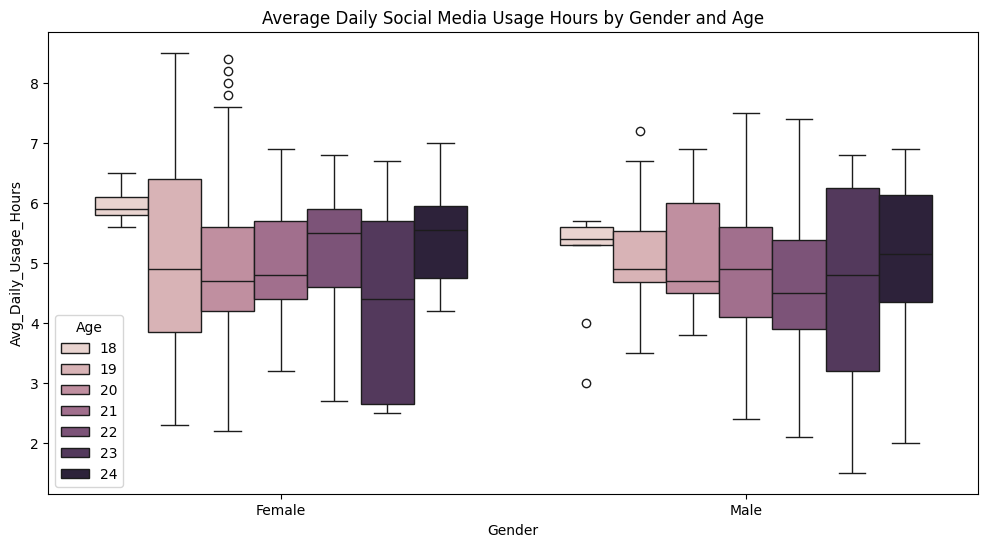

In [ ]:
# Relationship between Age, Gender, and Daily Usage
plt.figure(figsize=(12, 6))
sns.boxplot(x='Gender', y='Avg_Daily_Usage_Hours', hue='Age', data=df)
plt.title('Average Daily Social Media Usage Hours by Gender and Age')
plt.show()



Average Daily Social Media Usage Hours by Gender and Age: <br> It appears that average daily social media usage hours vary across both gender and age groups, with some age groups showing higher usage within each gender.

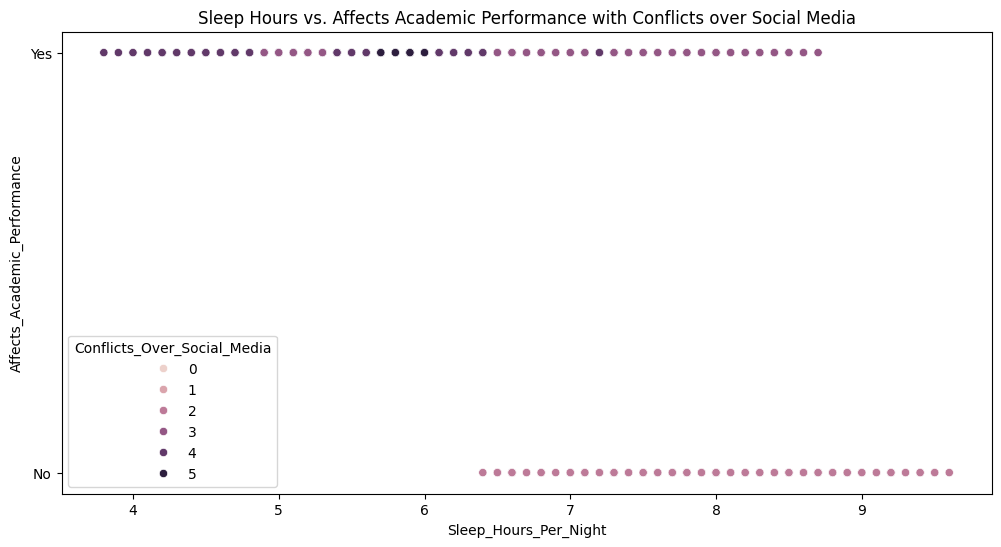

In [ ]:
# Relationship between Sleep patterns, Academic performance, and Social interaction
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Sleep_Hours_Per_Night', y='Affects_Academic_Performance', hue='Conflicts_Over_Social_Media', data=df)
plt.title('Sleep Hours vs. Affects Academic Performance with Conflicts over Social Media')
plt.show()

Sleep Hours vs. Affects Academic Performance with Conflicts over Social Media: <br>
1. The scatter plot shows a distinction in sleep hours between those whose academic performance is affected and those whose isn't. There seems to be some overlap in sleep hours for different levels of conflicts over social media, especially for those whose academic performance is affected. <br>
2. Those having less sleep time, their Academic performance seen to be affected.

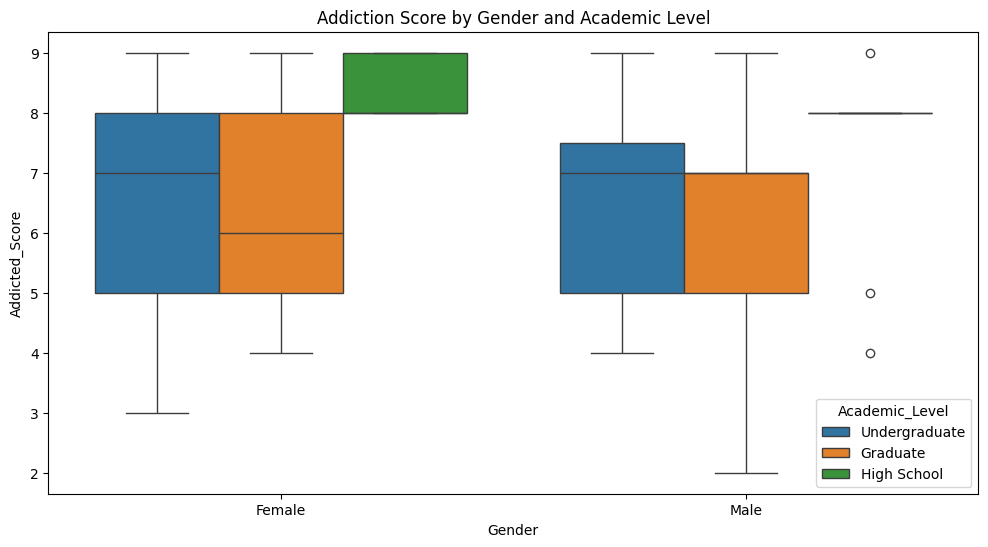

In [ ]:
# Addiction variation across demographics (Gender and Academic Level)
plt.figure(figsize=(12, 6))
sns.boxplot(x='Gender', y='Addicted_Score', hue='Academic_Level', data=df)
plt.title('Addiction Score by Gender and Academic Level')
plt.show()

Addiction Score by Gender and Academic Level:<br>
 1. The addiction scores also show variations based on gender and academic level, with some groups having higher median scores or a wider spread of scores than others. <br>
 2. Female High School students appear to have the highest average addiction scores.

### Aggregation & Insights

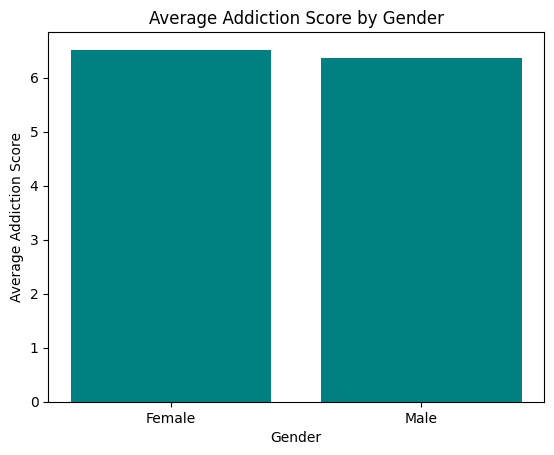

In [ ]:
# Average Addiction Score by Gender
addiction_group = df.groupby('Gender')['Addicted_Score'].mean()
addiction_group
plt.bar(addiction_group.index, addiction_group.values, color = "teal")
plt.xlabel('Gender')
plt.ylabel('Average Addiction Score')
plt.title('Average Addiction Score by Gender')
plt.show()

Insights <br>
The average addiction scores are very similar for both male and female students in this dataset, with female students showing a slightly higher average score.

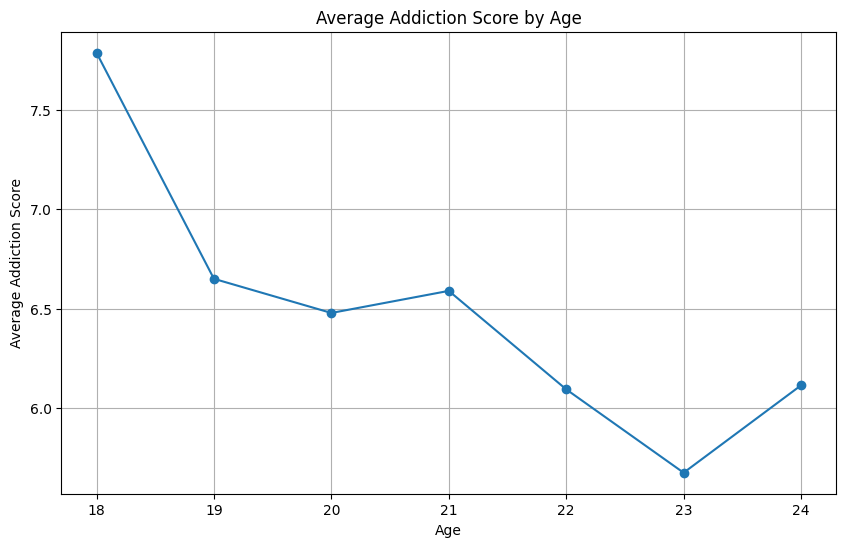

In [ ]:
# Average Addiction Score by Age
addiction_group_age = df.groupby('Age')['Addicted_Score'].mean()

plt.figure(figsize=(10, 6))
plt.plot(addiction_group_age.index, addiction_group_age.values, marker='o', linestyle='-')
plt.xlabel('Age')
plt.ylabel('Average Addiction Score')
plt.title('Average Addiction Score by Age')
plt.grid(True)
plt.show()

Insight: <br>
The chart shows a general downward trend in average addiction score as age increases, particularly from age 18 to 23, with a slight increase at age 24.

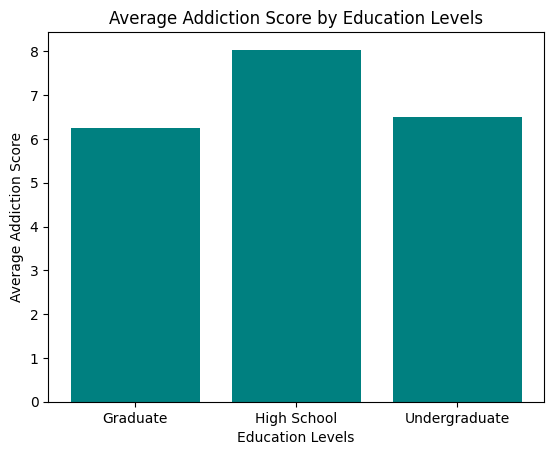

In [ ]:
# Average Addiction Score by Education Level
addiction_group = df.groupby('Academic_Level')['Addicted_Score'].mean()
addiction_group
plt.bar(addiction_group.index, addiction_group.values, color = "teal")
plt.xlabel('Education Levels')
plt.ylabel('Average Addiction Score')
plt.title('Average Addiction Score by Education Levels')
plt.show()

Insights: <br>
High School students appear to have the highest average addiction scores among the academic levels, followed by Undergraduate and then Graduate students.

### Functions, Loops, and Conditionals


In [ ]:
def classify_risk_level(usage_hours):
    """Classifies social media addiction risk level based on daily usage hours."""
    if usage_hours < 3:
        return "Low Risk"
    elif 3 <= usage_hours < 6:
        return "Medium Risk"
    else:
        return "High Risk"

def suggest_detox_strategy(risk_level):
    """Suggests digital detox strategies based on risk level."""
    if risk_level == "Low Risk":
        return "Maintain healthy habits and be mindful of screen time."
    elif risk_level == "Medium Risk":
        return "Consider setting daily time limits for social media."
    elif risk_level == "High Risk":
        return "Seek professional help and consider a structured digital detox plan."
    else:
        return "Invalid risk level."

In [ ]:
df['Risk_Level'] = df['Avg_Daily_Usage_Hours'].apply(classify_risk_level)
df['Detox_Strategy'] = df['Risk_Level'].apply(suggest_detox_strategy)

display(df[['Avg_Daily_Usage_Hours', 'Risk_Level', 'Detox_Strategy']].head())

,Avg_Daily_Usage_Hours,Risk_Level,Detox_Strategy
0,5.2,Medium Risk,Consider setting daily time limits for social ...
1,2.1,Low Risk,Maintain healthy habits and be mindful of scre...
2,6.0,High Risk,Seek professional help and consider a structur...
3,3.0,Medium Risk,Consider setting daily time limits for social ...
4,4.5,Medium Risk,Consider setting daily time limits for social ...


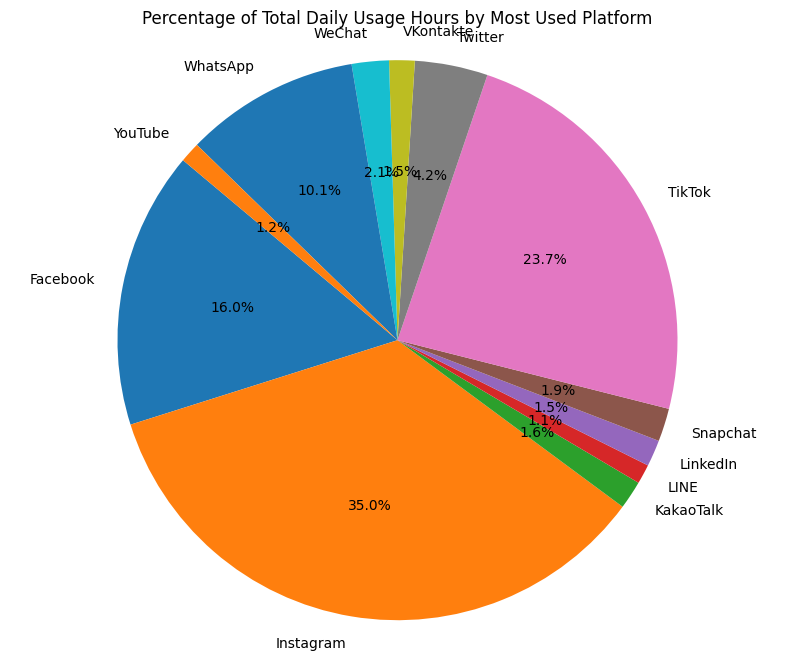

In [ ]:
# Calculate total usage hours per platform
platform_usage = df.groupby('Most_Used_Platform')['Avg_Daily_Usage_Hours'].sum()

# Calculate percentages
platform_usage_percentage = platform_usage / platform_usage.sum() * 100

# Create a pie chart
plt.figure(figsize=(10, 8))
plt.pie(platform_usage_percentage, labels=platform_usage_percentage.index, autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Total Daily Usage Hours by Most Used Platform')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

Insights : <br>
1. Instagram accounts for the largest percentage of total daily social media usage hours among the listed platforms. <br>
2. Several platforms like LINE, YouTube, KakaoTalk, LinkedIn, VKontakte, and Snapchat represent a relatively small percentage of the total daily usage hours compared to platforms like Instagram, TikTok, Facebook, and WhatsApp.

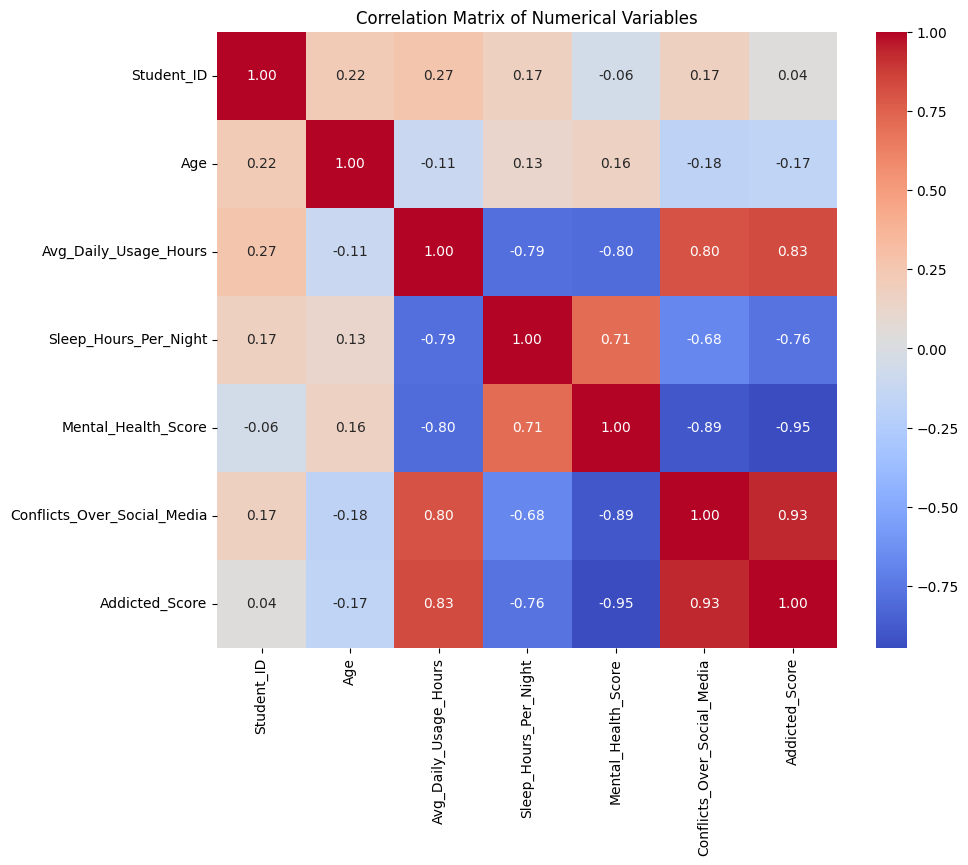


Insights from the correlation matrix:
- There is a strong positive correlation between 'Avg_Daily_Usage_Hours', 'Conflicts_Over_Social_Media', and 'Addicted_Score'. This suggests that as daily social media usage increases, so do conflicts over social media and the addiction score.
- 'Sleep_Hours_Per_Night' and 'Mental_Health_Score' show strong negative correlations with 'Avg_Daily_Usage_Hours', 'Conflicts_Over_Social_Media', and 'Addicted_Score'. This indicates that higher social media usage and addiction are associated with fewer sleep hours and lower mental health scores.
- 'Mental_Health_Score' and 'Sleep_Hours_Per_Night' have a strong positive correlation, suggesting that more sleep is associated with better mental health.


In [ ]:
# Select only numerical columns for correlation matrix
numerical_df = df.select_dtypes(include=[np.number])

# Calculate the correlation matrix
correlation_matrix = numerical_df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

# Insights from the correlation matrix
print("\nInsights from the correlation matrix:")
print("- There is a strong positive correlation between 'Avg_Daily_Usage_Hours', 'Conflicts_Over_Social_Media', and 'Addicted_Score'. This suggests that as daily social media usage increases, so do conflicts over social media and the addiction score.")
print("- 'Sleep_Hours_Per_Night' and 'Mental_Health_Score' show strong negative correlations with 'Avg_Daily_Usage_Hours', 'Conflicts_Over_Social_Media', and 'Addicted_Score'. This indicates that higher social media usage and addiction are associated with fewer sleep hours and lower mental health scores.")
print("- 'Mental_Health_Score' and 'Sleep_Hours_Per_Night' have a strong positive correlation, suggesting that more sleep is associated with better mental health.")

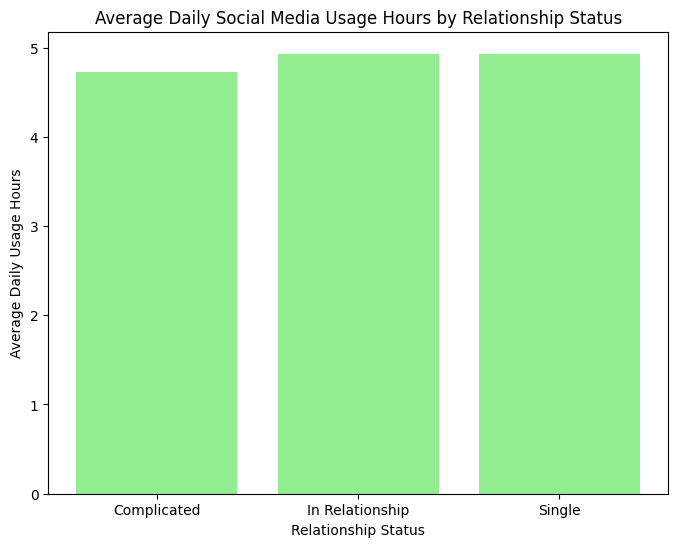

In [ ]:
# Create a bar chart for average daily usage hours by relationship status
relationship_data = df.groupby('Relationship_Status')['Avg_Daily_Usage_Hours'].mean()

plt.figure(figsize=(8, 6))
plt.bar(relationship_data.index, relationship_data.values, color = "lightgreen")
plt.title('Average Daily Social Media Usage Hours by Relationship Status')
plt.xlabel('Relationship Status')
plt.ylabel('Average Daily Usage Hours')
plt.xticks(rotation=0)
plt.show()

Key Insight <br>
1. The average daily social media usage hours are quite similar across all three relationship statuses: 'Complicated', 'In Relationship', and 'Single'. <br>
2. There is no significant difference in average daily social media usage based on a student's relationship status in this dataset.

### Storytelling Deliverable

1. Key Patterns: Higher social media usage correlates strongly with increased conflicts over social media and higher addiction scores. This increased usage and addiction are, in turn, linked to fewer sleep hours and lower mental health scores. Younger students and those in high school show higher average addiction. <br>

2. Potential Root Causes: The analysis suggests that excessive daily social media usage could be a significant root cause leading to increased conflicts, addiction, reduced sleep, and negative impacts on mental health and potentially academic performance among students.<br>
## Recommended Actions:
1. **Promote awareness and education**: Educate students, especially younger ones and high schoolers, about the potential negative impacts of excessive social media use on sleep, mental health, and academic performance.<br>
2. **Encourage setting healthy boundaries:** Recommend setting daily time limits for social media usage and scheduling screen-free times, especially before bed. <br>
3. **Develop coping mechanisms:** Encourage students to find alternative activities and healthy ways to manage stress and conflicts that do not involve excessive social media use.<br>
4. **Suggest seeking support:** For students with high addiction scores or those experiencing significant negative impacts, recommend seeking professional help or utilizing structured digital detox plans.